<a href="https://colab.research.google.com/github/SayuruA/Basics-of-Image-Processing/blob/main/part_1_Intensity_Transforming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(810, 720)


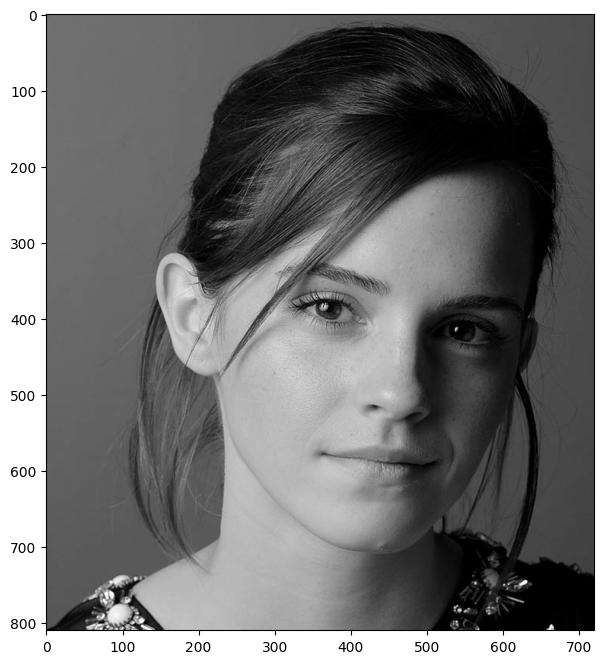

In [342]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

path ="/content/drive/MyDrive/a1images/"

im = cv.imread(path+"emma.jpg", cv.IMREAD_GRAYSCALE)
print(im.shape)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

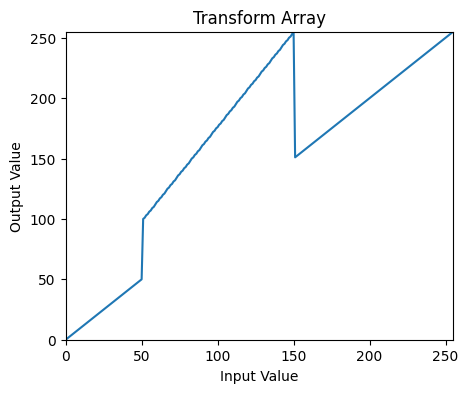

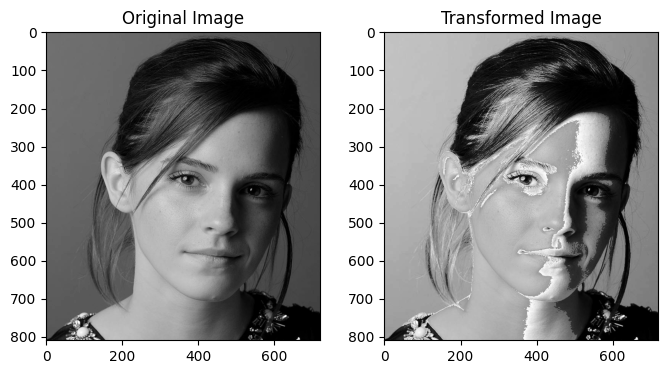

In [84]:
t = np.linspace(0, 255, 256).astype(np.uint8)
t_ = np.linspace(100, 255, 100).astype(np.uint8)

# final transform (51 goes to 100 and 150 goes to 255)
transform = t.copy()
transform[51:151] = t_
im_transformed = cv.LUT(im, transform)

# plot the transform array
plt.figure(figsize=(5, 4))
plt.plot(transform)
plt.xlabel("Input Value")
plt.ylabel("Output Value")
plt.title("Transform Array")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()
print('\n\n')
# show the original and transformed images side by side
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow
ax[0].set_title("Original Image")
ax[1].imshow(im_transformed, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title("Transformed Image")
plt.show()

(217, 181)


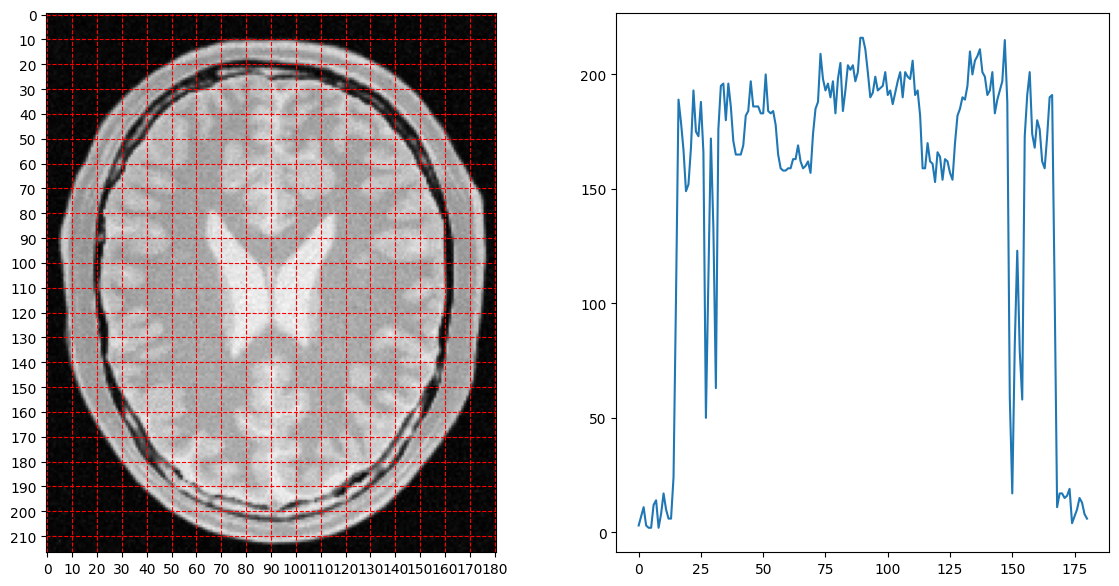

In [145]:
im_brain = cv.imread(path+"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
print(im_brain.shape)

fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].imshow(im_brain, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_xticks(np.arange(0,181,10))
ax[0].set_yticks(np.arange(0,217,10))
ax[0].grid(color='red',linestyle='--')


i_arr = im_brain[60]
ax[1].plot(i_arr)
plt.show()

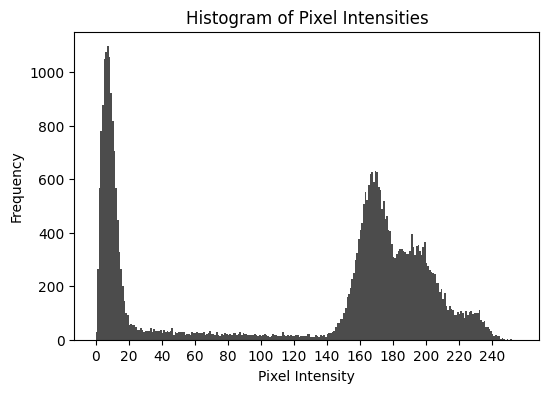

In [104]:
# plot the histogram of im_brain intensities
pixels = im_brain.flatten()

# create a histogram
plt.figure(figsize=(6,4))
plt.hist(pixels, bins=256, range=(0, 256), color='black', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.xticks(np.arange(0,255,20))
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()


In [ ]:
im_brain[120][60]

**Observations**


*   The high frequency at the begining corresponds to the background black pixels.
*   The *white matter* is approximately distrbuted in the intensity range from 140 to 180.
* The *grey matter* is approximately distrbuted in the intensity range from 170 to 255.



In [225]:
def accentuate(im_brain, matter = 'white', filtering ='True'):

  # decide the threshold values depending the matter
  if matter == 'white':
    lt =140; ht = 180 # low and high thresholds
    map_start = 0 # starting value of the mapping (see mapping)
  elif matter == 'grey':
    lt = 180; ht = 255
    map_start = 100

  # initialize transform array as below
  transform = np.linspace(0, 255, 256).astype(np.uint8)
  # suppress values until lt
  transform[0:lt] = np.linspace(0, 0, lt).astype(np.uint8)
  # map values in the interested range
  transform[lt:ht] = np.linspace(map_start, 255, ht-lt).astype(np.uint8)
  # suppress values after the interested range
  transform[ht:256] = np.linspace(0, 0, 256-ht).astype(np.uint8)

  # do averarage filtering to the original
  if filtering == 'True':
    im_filtered = im_brain.copy()
    kernal = np.ones((3,3), np.float32)/9
    im_filtered = cv.filter2D(im_brain, -1, kernal)
  else:
    im_filtered = im_brain

  # apply the mapping
  im_accentuated = cv.LUT(im_filtered, transform)
  return im_accentuated, transform


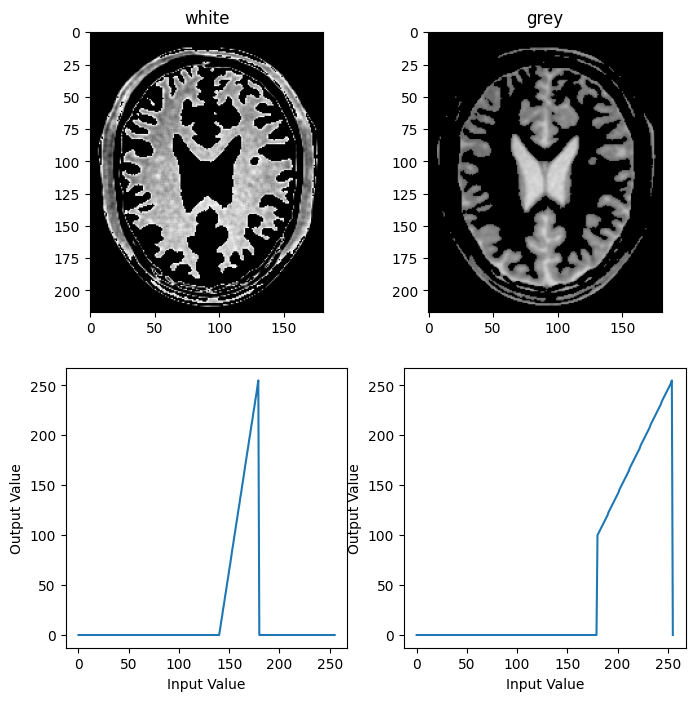

In [227]:
fig, ax = plt.subplots(2, 2 , figsize=(8,8))
for i, matter in enumerate(['white', 'grey']):
  im_accentuated, transform = accentuate(im_brain, matter = matter, filtering ='True')
  ax[0][i].imshow(im_accentuated, cmap = 'gray', vmin = 0, vmax = 255)
  ax[0][i].set_title(matter)

  ax[1][i].plot(transform)
  ax[1][i].set_xlabel("Input Value")
  ax[1][i].set_ylabel("Output Value")

plt.show()

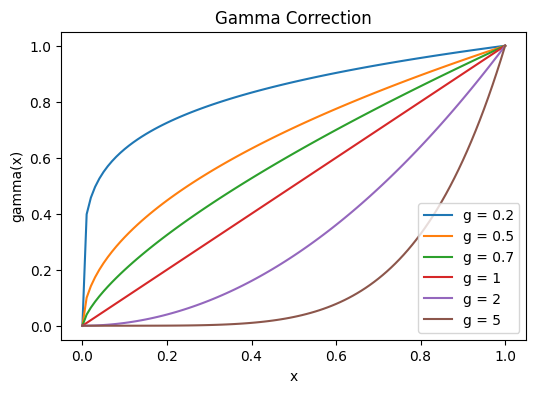

In [149]:
# gamma correction
plt.figure(figsize=(6,4))

for g in [0.2, 0.5, 0.7, 1, 2, 5] :
  x = np.linspace(0,1,101)
  gamma = x**g
  plt.plot(x,gamma)

plt.xlabel('x')
plt.ylabel('gamma(x)')
plt.title('Gamma Correction')
plt.legend(['g = 0.2', 'g = 0.5', 'g = 0.7', 'g = 1', 'g = 2', 'g = 5'])
plt.show()

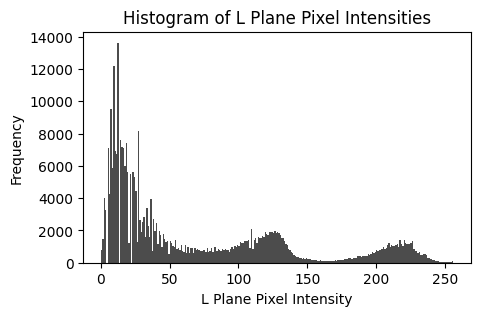

In [299]:
# image for gamma correction
im_gamma = cv.imread(path+"highlights_and_shadows.jpg")

# convert to lab space and extract L plane
im_gamma = cv.cvtColor(im_gamma, cv.COLOR_BGR2Lab)
L, a, b = cv.split(im_gamma)
pixels_L = L.flatten()

# plot the histogram to decide the correction required
plt.figure(figsize=(5,3))
plt.hist(pixels_L, bins=256, range=(0, 256), color='black', alpha=0.7)
plt.xlabel('L Plane Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of L Plane Pixel Intensities')
plt.show()

* A gamma correction with a gamma value less than 1 would be suitable.

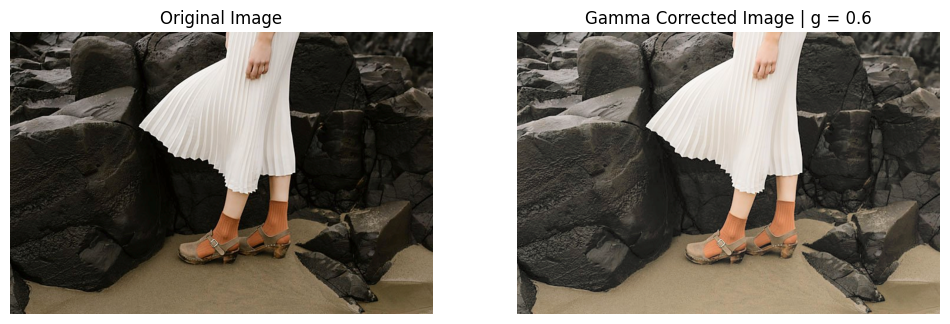

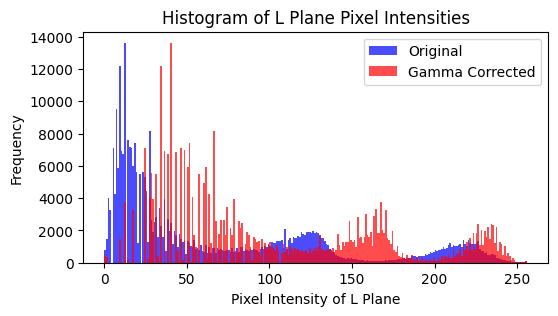

In [298]:
# set the gamma value
g = 0.6

# create the gamma transformation
x = np.linspace(0,1,256)
gamma = x**g
# gamma transformation
trnf = (gamma*255).astype(np.uint8)
new = cv.LUT(L, trnf)

# gamma corrected image
gamma_im = cv.merge((new, a, b))
gamma_im = cv.cvtColor(gamma_im, cv.COLOR_Lab2RGB)

# plot the original and gamma corrected images side by side
fig, ax = plt.subplots(1, 2 , figsize=(12,8))
ax[0].imshow(cv.cvtColor(im_gamma, cv.COLOR_Lab2RGB) ) #
ax[0].set_title("Original Image")
ax[1].imshow(gamma_im)
ax[1].set_title("Gamma Corrected Image | g = "+str(g))
ax[ 0].axis('off')
ax[ 1].axis('off')
plt.show()

# plot the histogram of the gamma corrected L plane (of Lab space)
temp = cv.cvtColor(gamma_im, cv.COLOR_RGB2Lab)
g_L, g_a , g_b = cv.split(temp)

print('\n\n')
plt.figure(figsize=(6,3))
plt.hist(pixels_L, bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.hist(g_L.flatten(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.legend(['Original','Gamma Corrected'])
plt.xlabel('Pixel Intensity of L Plane')
plt.ylabel('Frequency')
plt.title('Histogram of L Plane Pixel Intensities')
plt.show()

In [395]:
def vibrancy_enhance(im_vib, a, sigma = 70):
  H, S, V = cv.split(im_vib) # note that the H values vary from 0 - 180, others are as usual

  # define the tranfromation for the vibrancy
  tr_vib = np.linspace(0, 255, 256) # important: don't use finite point right away
  temp_vib1 = -(1/2)*((tr_vib - 128)/ (sigma))**2
  temp_vib2 = 128* a * np.exp(temp_vib1) + tr_vib
  # final transformation
  vib_trans = np.minimum( 255, temp_vib2).astype(np.uint8)

  # vibarancy enhanced image
  vib_S = cv.LUT(S, vib_trans)
  vib_im = cv.merge((H, vib_S, V))
  return vib_im, vib_trans


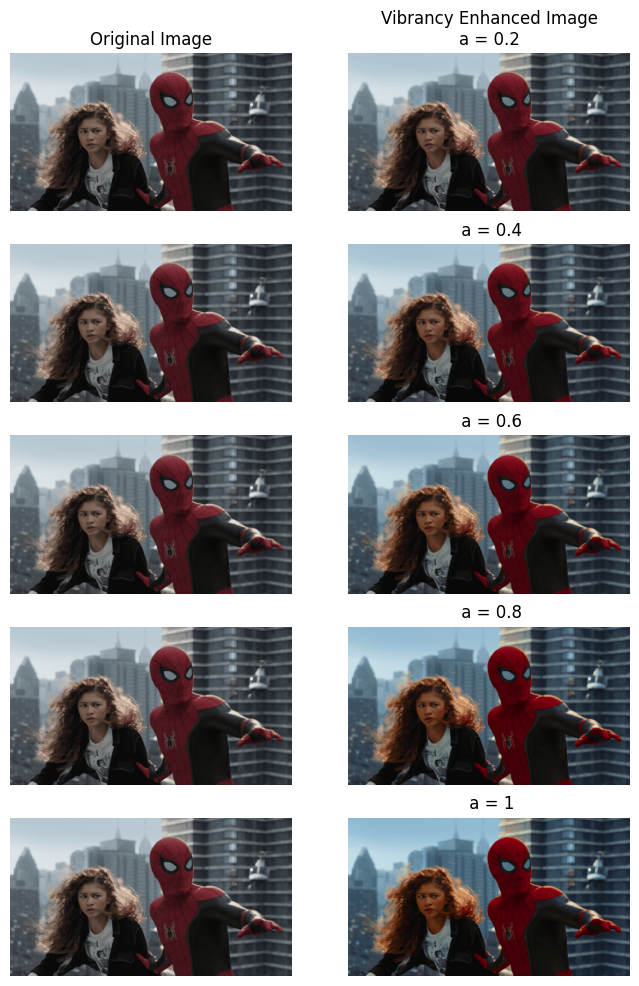

In [397]:
# image for vibrancy enhancing
im_vib = cv.imread(path+"spider.png")
im_vib = cv.cvtColor(im_vib, cv.COLOR_BGR2HSV)

# vibrancy enhanced images. Changing 'a' from 0 to 1
fig, ax = plt.subplots(5,2, figsize=(8,12))

for i,a in enumerate([0.2, 0.4, 0.6, 0.8, 1]):
  vib_im, vib_trans = vibrancy_enhance(im_vib, a)
  ax[i][0].imshow(cv.cvtColor(im_vib, cv.COLOR_HSV2RGB))
  ax[i][1].imshow(cv.cvtColor(vib_im, cv.COLOR_HSV2RGB))
  ax[i][0].axis('off')
  ax[i][1].axis('off')
  ax[i][1].set_title(" a = "+str(a))

ax[0][0].set_title("Original Image")
ax[0][1].set_title("Vibrancy Enhanced Image\n"+"a = 0.2")
plt.show()

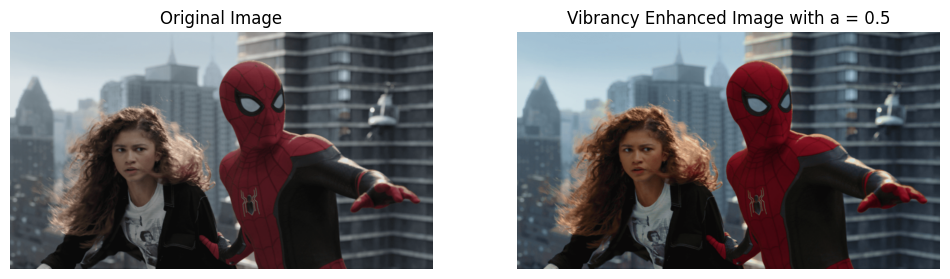

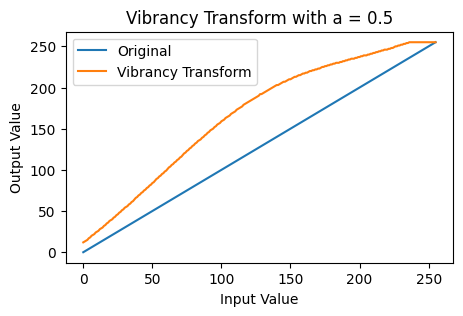

In [413]:
# image for vibrancy enhancing
im_vib = cv.imread(path+"spider.png")
im_vib = cv.cvtColor(im_vib, cv.COLOR_BGR2HSV)


H, S, V = cv.split(im_vib) # note that the H values vary from 0 - 180, others are as usual

# call the vibrancy function with a = 0.5
a =0.5
vib_im, vib_trans = vibrancy_enhance(im_vib, a)

# original and enhanced images side by side
fig, ax = plt.subplots(1, 2 , figsize=(12,12))
ax[0].imshow(cv.cvtColor(im_vib, cv.COLOR_HSV2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(vib_im, cv.COLOR_HSV2RGB))
ax[1].set_title("Vibrancy Enhanced Image with a = "+ str(a))
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# transformation
print('\n\n')
plt.figure(figsize=(5,3))
plt.plot(np.linspace(0,255,256))
plt.plot(vib_trans)
plt.title("Vibrancy Transform with a = "+ str(a))
plt.xlabel("Input Value")
plt.ylabel("Output Value")
plt.legend(['Original', 'Vibrancy Transform'])
plt.show()


In [433]:
def histogram_equal(im):

  # flatten the image to an array
  pixels = im.flatten()
  # calculate the histogram and cdf
  hist, bins = np.histogram(pixels, 256, [0,256])
  cdf = hist.cumsum()
  # normalize the cdf by dividing by the number of pixels and the multiplying by the number of levels
  cdf_normalized = cdf * 255 / pixels.size
  equl_im = cv.LUT(im, cdf_normalized.astype('uint8'))
  return equl_im


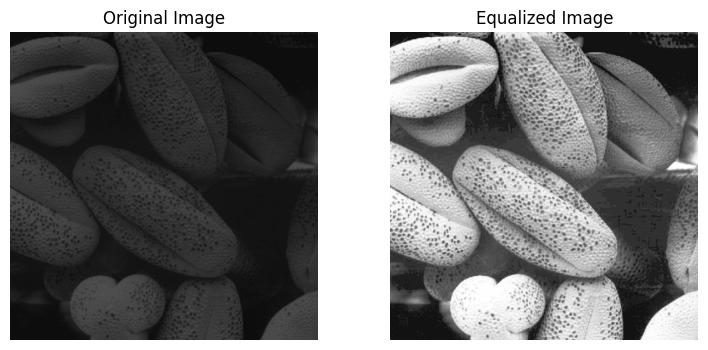

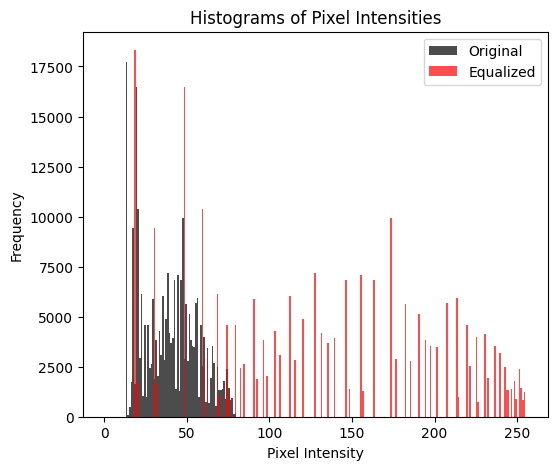

In [436]:
im_equl = cv.imread(path+"shells.tif", cv.IMREAD_GRAYSCALE)
equl_im = histogram_equal(im_equl)

# plot the equalized image
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].imshow(im_equl, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(equl_im, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title("Equalized Image")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# plot the histograms before and after
print('\n\n')
plt.figure(figsize=(6,5))
plt.hist(im_equl.flatten(), bins=256, range=(0, 256), color='black', alpha=0.7)
plt.hist(equl_im.flatten(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.legend(['Original','Equalized'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histograms of Pixel Intensities')
plt.show()